## *Predict automobile price using Machine Learning*
Use Machine learning to predict the price of a car based on several characteristics. The objective is to build a model to understand the factors that drive the car of the price. This will help your automobile company launch their new car in the market effectively by pricing it better. 
 
Tasks: 
 
 * Perform EDA on the data -
 * Perform data cleanup as required - 
 * Pick the best variable for making a simple linear regression model - 
 * Perform train test split - 
 * Build model using best variable and report the R2 - 
 * Make a multiple regression model 
    * Apply feature selection approaches discussed in the class - 
 * Final model should be interpretable
    * What is your understanding of the factors that drive price? 

In [221]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [222]:
#importing data
df = pd.read_csv('AutoData.csv')
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [223]:
df.tail()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [224]:
#checking columns
df.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [225]:
#Checking shape of data
df.shape

(205, 25)

In [226]:
#checking missing values
df.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [227]:
#Statistical info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [228]:
# Checking data type of each feature
df.dtypes

symboling             int64
make                 object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

## Data cleaning and Preparation

In [229]:
#Checking any other value in columns rather then null
df.isin(['?','NA','N/A']).any()

symboling           False
make                False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [230]:
#Splitting company name from make column
make1 = df['make'].apply(lambda x: x.split(' ')[0])
df.insert(1,'CompanyName',make1)
df.drop('make',axis=1,inplace=True)
df.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [231]:
#checking unique value in make1
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

* There are some spelling error in the Company name in make1 column
  * maxda = mazda
  * Nissan = nissan
  * porsche = porcshce
  * toyota = toyouta
  * vokswagen = volkswagen = vw

In [232]:
#changing all value in lower case in make1 column
df.CompanyName = df.CompanyName.str.lower()


In [233]:
def replace_name(a,b,Series):
    '''it replace a into b in Series '''
    Series.replace(a,b,inplace=True)

In [234]:
# Replacing right names for all above value in make1 column
replace_name('maxda','mazda',df.CompanyName)
replace_name('porcshce','porsche',df.CompanyName)
replace_name('toyouta','toyota',df.CompanyName)
replace_name('vokswagen','volkswagen',df.CompanyName)
replace_name('vw','volkswagen',df.CompanyName)

In [235]:
# Checking unique value again in make1 column
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [236]:
#chacking for duplicate row
df.loc[df.duplicated()]

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


## Target Variable analysis
  * Plot is right-skewed, means that the most price are low (below 15,000).
  * There are significant difference between the mean and median of the price.
  * The data points are far spread out from mean ,indicating high variance.
  * outliers are present in price


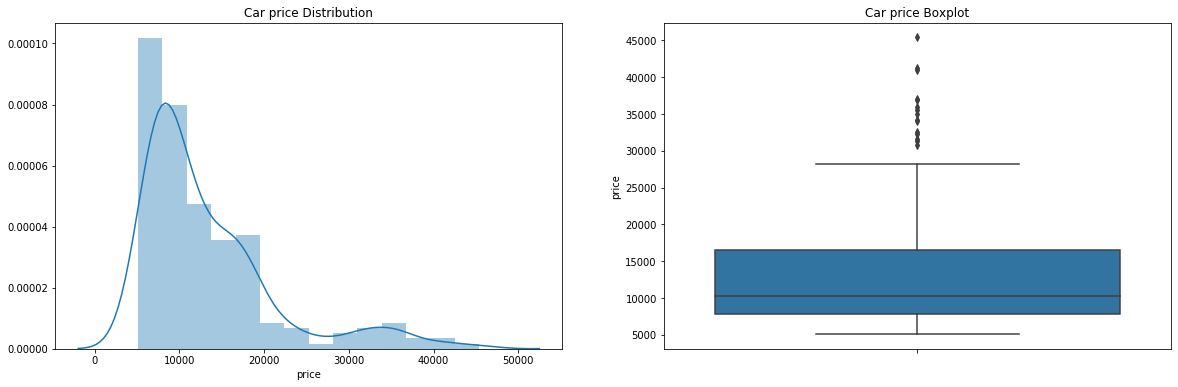

In [237]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.distplot(df.price)
plt.title('Car price Distribution')

plt.subplot(122)
sns.boxplot(y=df.price)
plt.title('Car price Boxplot')
plt.show()

In [238]:
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

## Categorical variable analysis
 * Toyota seemed to be favored car company
 * Number of gas fueld cars are more than diesel
 * sedan is most car prefere

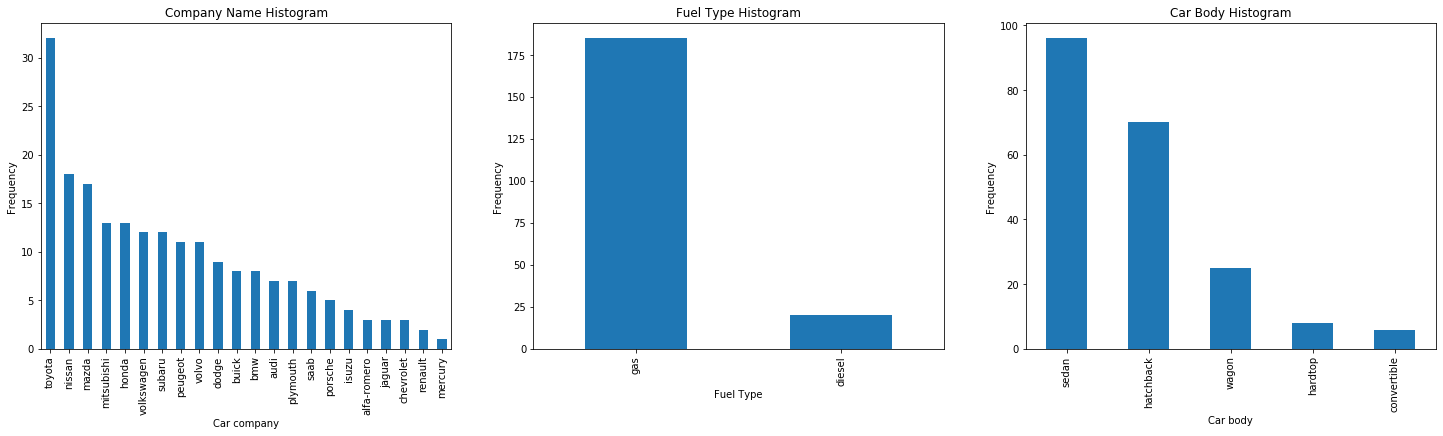

In [239]:
plt.figure(figsize=(25,6))
plt.subplot(131)
plt1 = df.CompanyName.value_counts().plot(kind='bar')
plt.title('Company Name Histogram')
plt1.set(xlabel='Car company',ylabel='Frequency')
plt.subplot(132)
plt1 = df.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel='Fuel Type',ylabel='Frequency')
plt.subplot(133)
plt1 = df.carbody.value_counts().plot(kind='bar')
plt.title('Car Body Histogram')
plt1.set(xlabel='Car body',ylabel='Frequency')
plt.show()

* The cars with symboling number 0 and 1 are most sold.
* the cars with -1 symboling seems to be high priced so insurance risk rating -1 is quite good.
* Symboling with 3 value  has the price range similer to -2 value. 

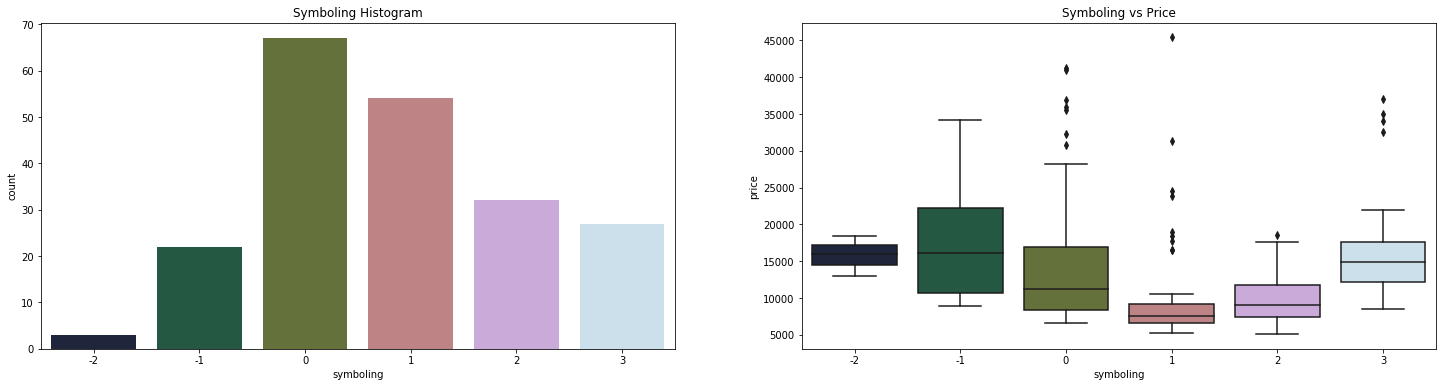

In [240]:
plt.figure(figsize=(25,6))
plt.subplot(121)
sns.countplot(df.symboling,palette=('cubehelix'))
plt.title('Symboling Histogram')
plt.subplot(122)
sns.boxplot(x=df.symboling,y=df.price,palette=('cubehelix'))
plt.title('Symboling vs Price')
plt.show()

* ohc Engine type are most favored type of engine.
* ohcv has the highest price range,ohc and ohcf have low price range.
* dohcv type engine car have highest avrage price.

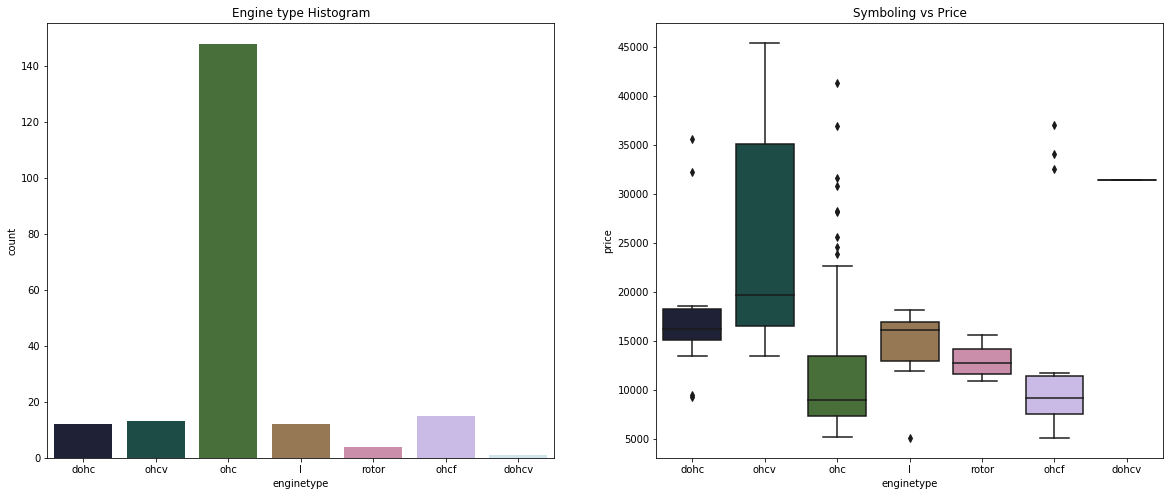

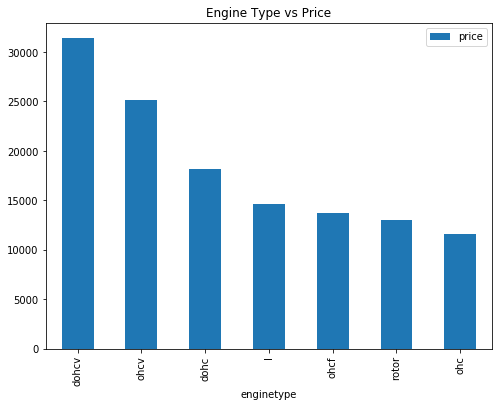

In [241]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.countplot(df.enginetype,palette=('cubehelix'))
plt.title('Engine type Histogram')
plt.subplot(122)
sns.boxplot(x=df.enginetype,y=df.price,palette=('cubehelix'))
plt.title('Symboling vs Price')
plt.show()

#Plotting engine type and average price
df1 = pd.DataFrame(df.groupby('enginetype')['price'].mean().sort_values(ascending=False))
df1.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Price')
plt.show()

* Jaguar and Buick have highest average Price.
* Diesal engine has highest average price tahn gas.
* hardtop and conevertiable body type cars have high average price.

<Figure size 1800x432 with 0 Axes>

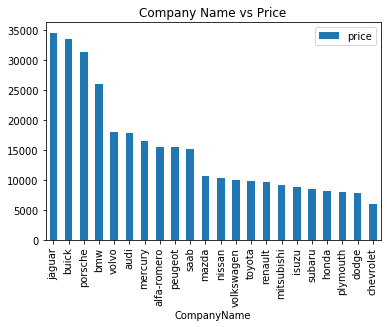

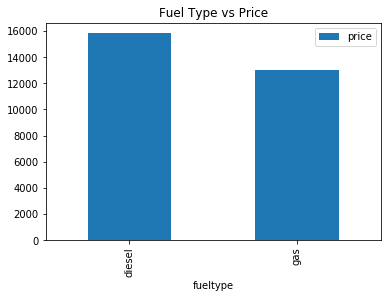

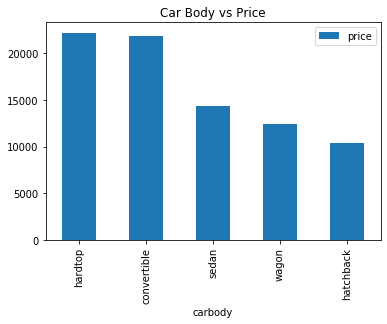

In [242]:
#Plotting engine type and average price
plt.figure(figsize=(25,6))
#plt.subplot(121)
df1 = pd.DataFrame(df.groupby('CompanyName')['price'].mean().sort_values(ascending=False))
df1.plot.bar()
plt.title('Company Name vs Price')
plt.show()

df1 = pd.DataFrame(df.groupby('fueltype')['price'].mean().sort_values(ascending=False))
df1.plot.bar()
plt.title('Fuel Type vs Price')
plt.show()

df1 = pd.DataFrame(df.groupby('carbody')['price'].mean().sort_values(ascending=False))
df1.plot.bar()
plt.title('Car Body vs Price')
plt.show()

* doornumber variable doesn't affact the price much. There is no significant difference between the categories.
* It seems aspiration with turbo have higher price range than std.

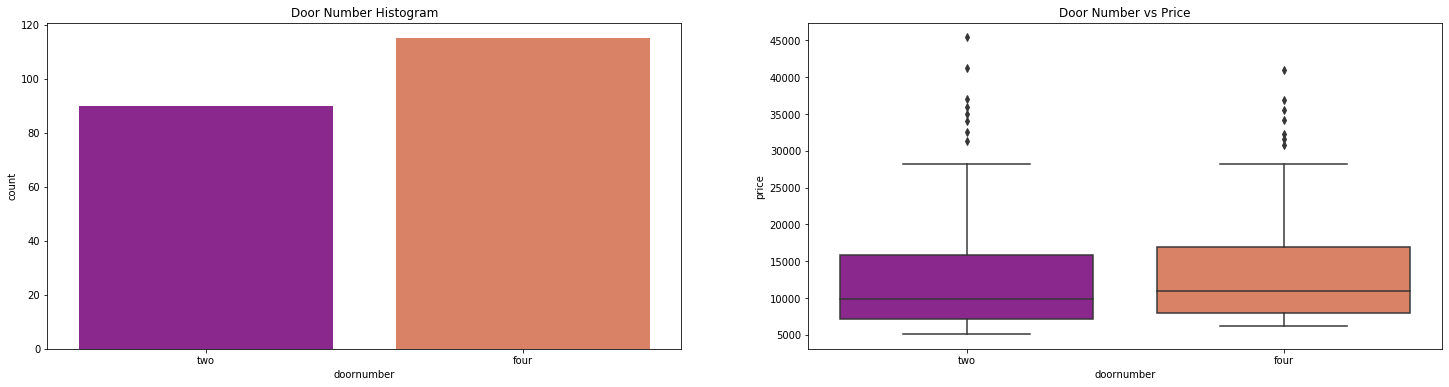

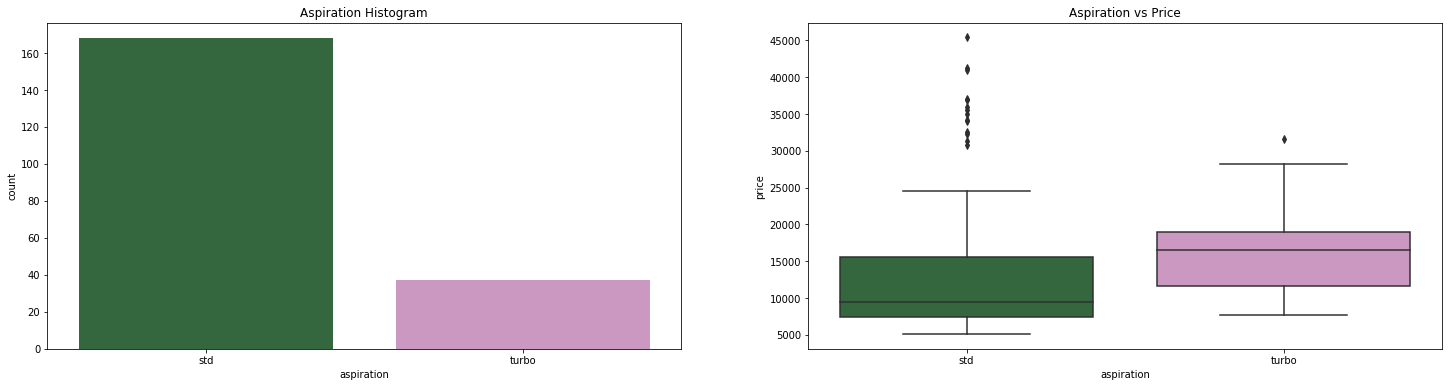

In [243]:
plt.figure(figsize=(25,6))
plt.subplot(121)
sns.countplot(df.doornumber,palette=('plasma'))
plt.title('Door Number Histogram')
plt.subplot(122)
sns.boxplot(x=df.doornumber,y=df.price,palette=('plasma'))
plt.title('Door Number vs Price')
plt.show()

plt.figure(figsize=(25,6))
plt.subplot(121)
sns.countplot(df.aspiration,palette=('cubehelix'))
plt.title('Aspiration Histogram')
plt.subplot(122)
sns.boxplot(x=df.aspiration,y=df.price,palette=('cubehelix'))
plt.title('Aspiration vs Price')
plt.show()

In [244]:
#Fuction to plot countplot for a variable
def count_plot(x,fig):
    '''Plot a count and boxplot'''
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(df[x],palette=('magma'))
    
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=df[x],y=df.price,palette=('magma'))

### inference:
 * In most of the car the location of engine at front and only few no. of car have rear engine location and high in price range.
 * Most common number of cylinders are four, six and five. Eight cylinders have the highest price range.
 * Most of the car have mpfi and 2bbl type fuel systems. mpfi and idi having the highest price range.
 * A very significant difference in drivwheel category. Most high ranged cars prefer rwd drivewheel.

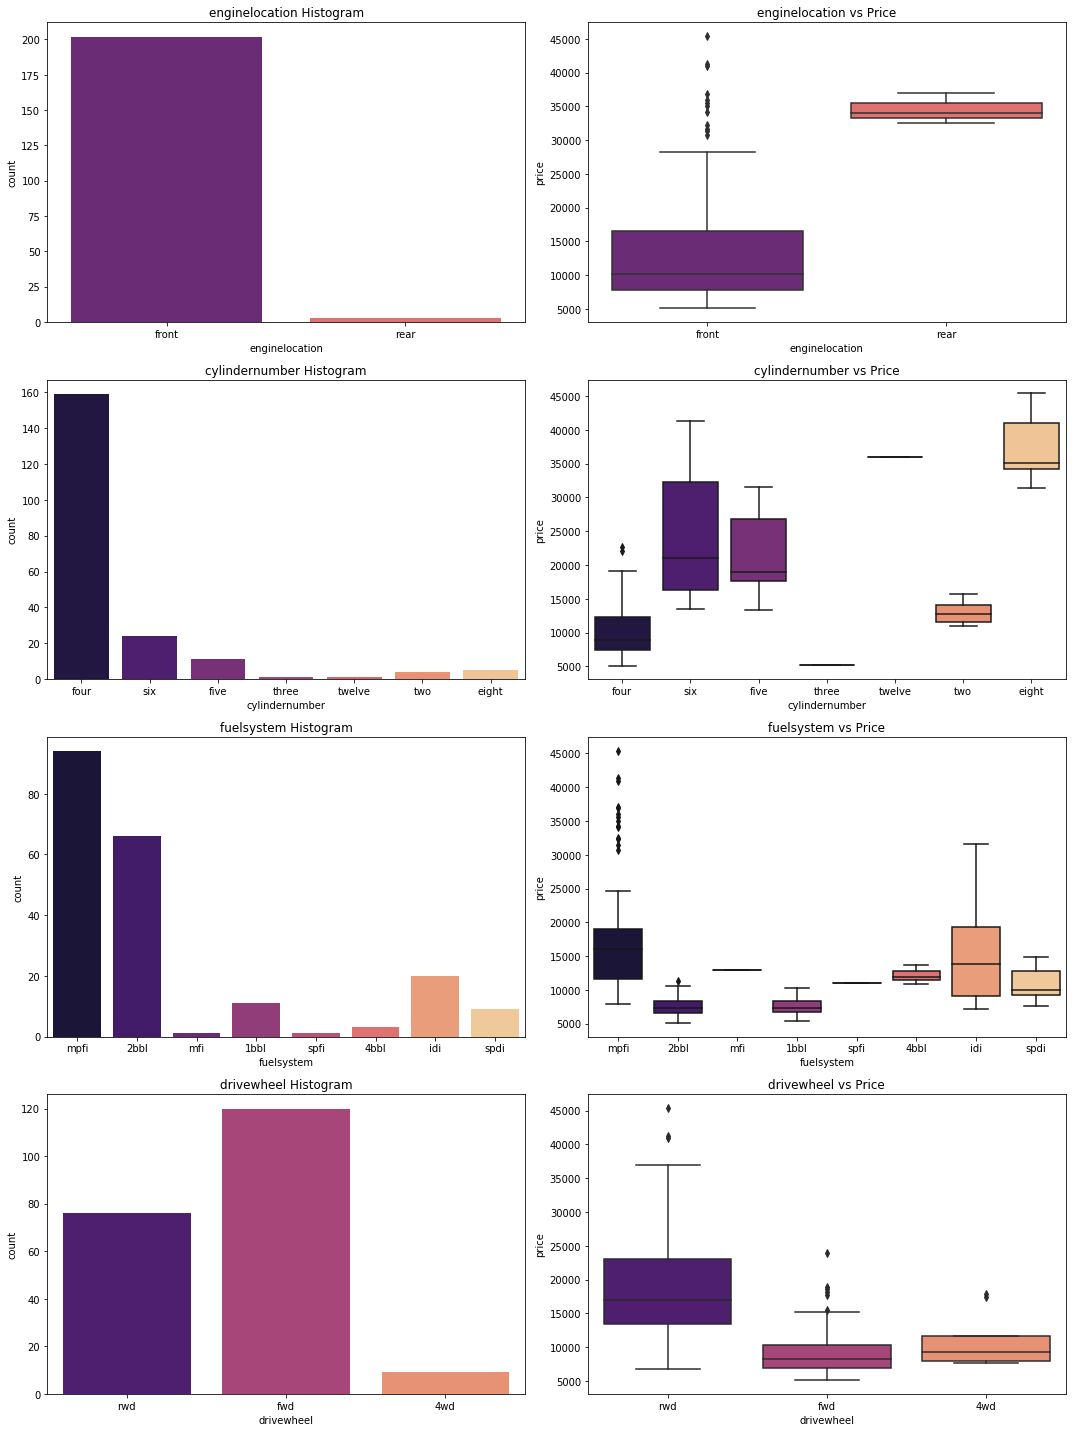

In [245]:
#plotting count and boxplot
plt.figure(figsize=(15,20))

count_plot('enginelocation',1)
count_plot('cylindernumber',3)
count_plot('fuelsystem',5)
count_plot('drivewheel',7)
plt.tight_layout()

## Numerical data analysis

In [246]:
# creating function which plot scatter plot with price
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df.price)
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

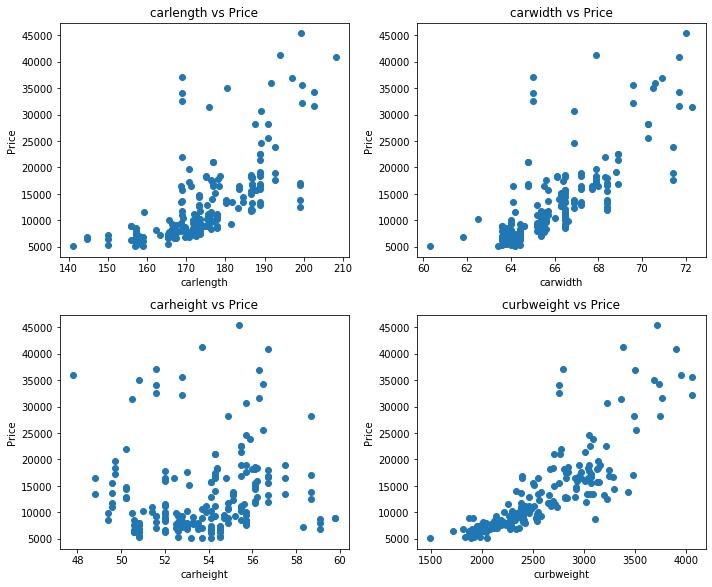

In [247]:
plt.figure(figsize=(10,20))
scatter('carlength',1)
scatter('carwidth',2)
scatter('carheight',3)
scatter('curbweight',4)

plt.tight_layout()

### Inference:
  * carwidth, carlength and curbweight have positive correlation with price.
  * carheight doesn't show any significant trend.

In [248]:
# Creating function which plot pair plot
def pp(x,y,z):
    sns.pairplot(df,x_vars=[x,y,z],y_vars= 'price', size= 4, aspect=1,kind= 'scatter')
    plt.show()

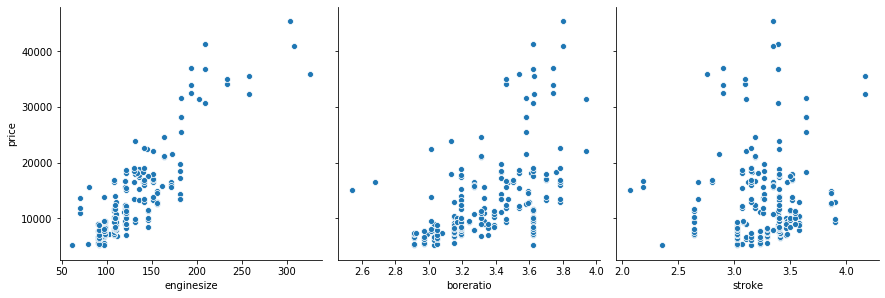

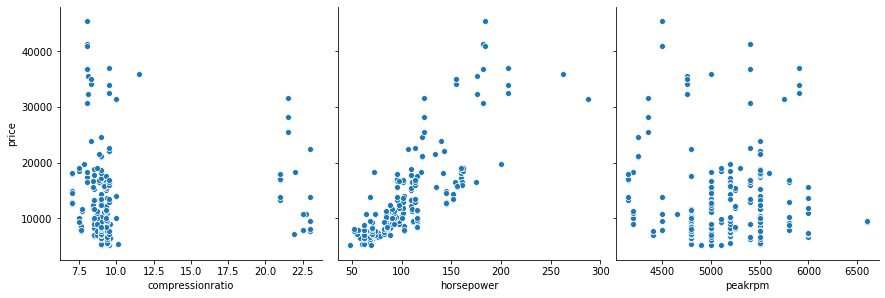

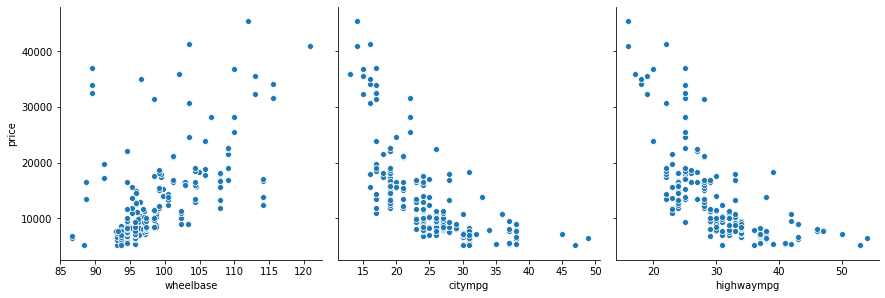

In [249]:
pp('enginesize','boreratio','stroke')
pp('compressionratio','horsepower','peakrpm')
pp('wheelbase','citympg','highwaympg')

### Inference:
 * enginesize, boreratio, horsepower, wheelbase  have positive correlation with price.
 * citympg, highwaympg have negitive correlation with price.
 * stoke , compressionratio and peakrpm deosn't show any significant realtion with price.

In [250]:
#driving new feature fuleeconomy
df['fueleconomy'] = (0.55*df['citympg'])+(0.45 * df['highwaympg'])

In [251]:
df.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80


In [252]:
# Bining the car companies based on avg price if each comapny
temp =df.copy()
table = temp.groupby('CompanyName')['price'].mean()
temp = temp.merge(table.reset_index(),how='left',on='CompanyName')
bins = [0,10000,20000,40000]
df_bins = ['Budget','Medium','Highend']
df['range'] = pd.cut(temp['price_y'],bins,right=False,labels=df_bins)
df.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,range
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70,Medium
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70,Medium
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15,Medium
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70,Medium
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80,Medium


### Bivariate analysis

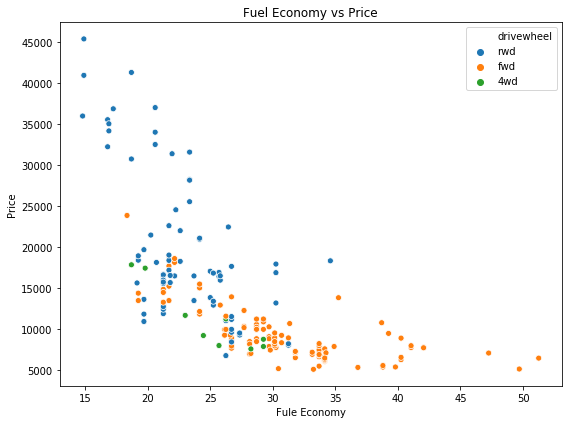

In [253]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.fueleconomy,y=df.price,hue=df.drivewheel)
plt.title('Fuel Economy vs Price')
plt.xlabel('Fule Economy')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

### Inference
 * fueleconomy has an obios negative correlation with price and is significant.

### List of significant variable from visual analysis
* Car Range
* Engine Type
* Fuel Type
* Car Body
* Aspiration
* Cylinder Number
* Driverwheel
* Curbewight
* Car length
* Car width
* Engine Size
* Boreratio
* Horse Power
* Wheel base
* Fuel Economy

In [254]:
df_lr =df[['price','enginetype','fueltype','carbody','aspiration','cylindernumber','wheelbase','curbweight','enginesize'
          ,'boreratio','horsepower','fueleconomy','carlength','carwidth','range']]
df_lr.head()

,price,enginetype,fueltype,carbody,aspiration,cylindernumber,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,range
0,13495.0,dohc,gas,convertible,std,four,88.6,2548,130,3.47,111,23.70,168.8,64.1,Medium
1,16500.0,dohc,gas,convertible,std,four,88.6,2548,130,3.47,111,23.70,168.8,64.1,Medium
2,16500.0,ohcv,gas,hatchback,std,six,94.5,2823,152,2.68,154,22.15,171.2,65.5,Medium
3,13950.0,ohc,gas,sedan,std,four,99.8,2337,109,3.19,102,26.70,176.6,66.2,Medium
4,17450.0,ohc,gas,sedan,std,five,99.4,2824,136,3.19,115,19.80,176.6,66.4,Medium


In [255]:
df_lr.shape

(205, 15)

In [256]:
df_lr = pd.get_dummies(df_lr,drop_first=True)

In [257]:
df_lr.columns

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'fueleconomy', 'carlength', 'carwidth',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fueltype_gas',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'aspiration_turbo', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'range_Medium',
       'range_Highend'],
      dtype='object')

In [258]:
df_lr.shape

(205, 29)

In [259]:
df_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,enginetype_dohcv,...,carbody_wagon,aspiration_turbo,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,range_Medium,range_Highend
0,13495.0,88.6,2548,130,3.47,111,23.70,168.8,64.1,0,...,0,0,0,1,0,0,0,0,1,0
1,16500.0,88.6,2548,130,3.47,111,23.70,168.8,64.1,0,...,0,0,0,1,0,0,0,0,1,0
2,16500.0,94.5,2823,152,2.68,154,22.15,171.2,65.5,0,...,0,0,0,0,1,0,0,0,1,0
3,13950.0,99.8,2337,109,3.19,102,26.70,176.6,66.2,0,...,0,0,0,1,0,0,0,0,1,0
4,17450.0,99.4,2824,136,3.19,115,19.80,176.6,66.4,0,...,0,0,1,0,0,0,0,0,1,0


In [260]:
#spliting train test
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df_lr,test_size=0.3,random_state=100)

In [261]:
#feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
num_vars = list(df_lr.iloc[:,:9].columns)

df_train[num_vars] = sc.fit_transform(df_train[num_vars])

In [262]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,enginetype_dohcv,...,carbody_wagon,aspiration_turbo,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,range_Medium,range_Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,0,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,0,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,0,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,0,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,0,...,1,1,0,1,0,0,0,0,1,0


In [263]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,enginetype_dohcv,...,carbody_wagon,aspiration_turbo,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,range_Medium,range_Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219310,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.006993,...,0.132867,0.181818,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.083624,...,0.340624,0.387050,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


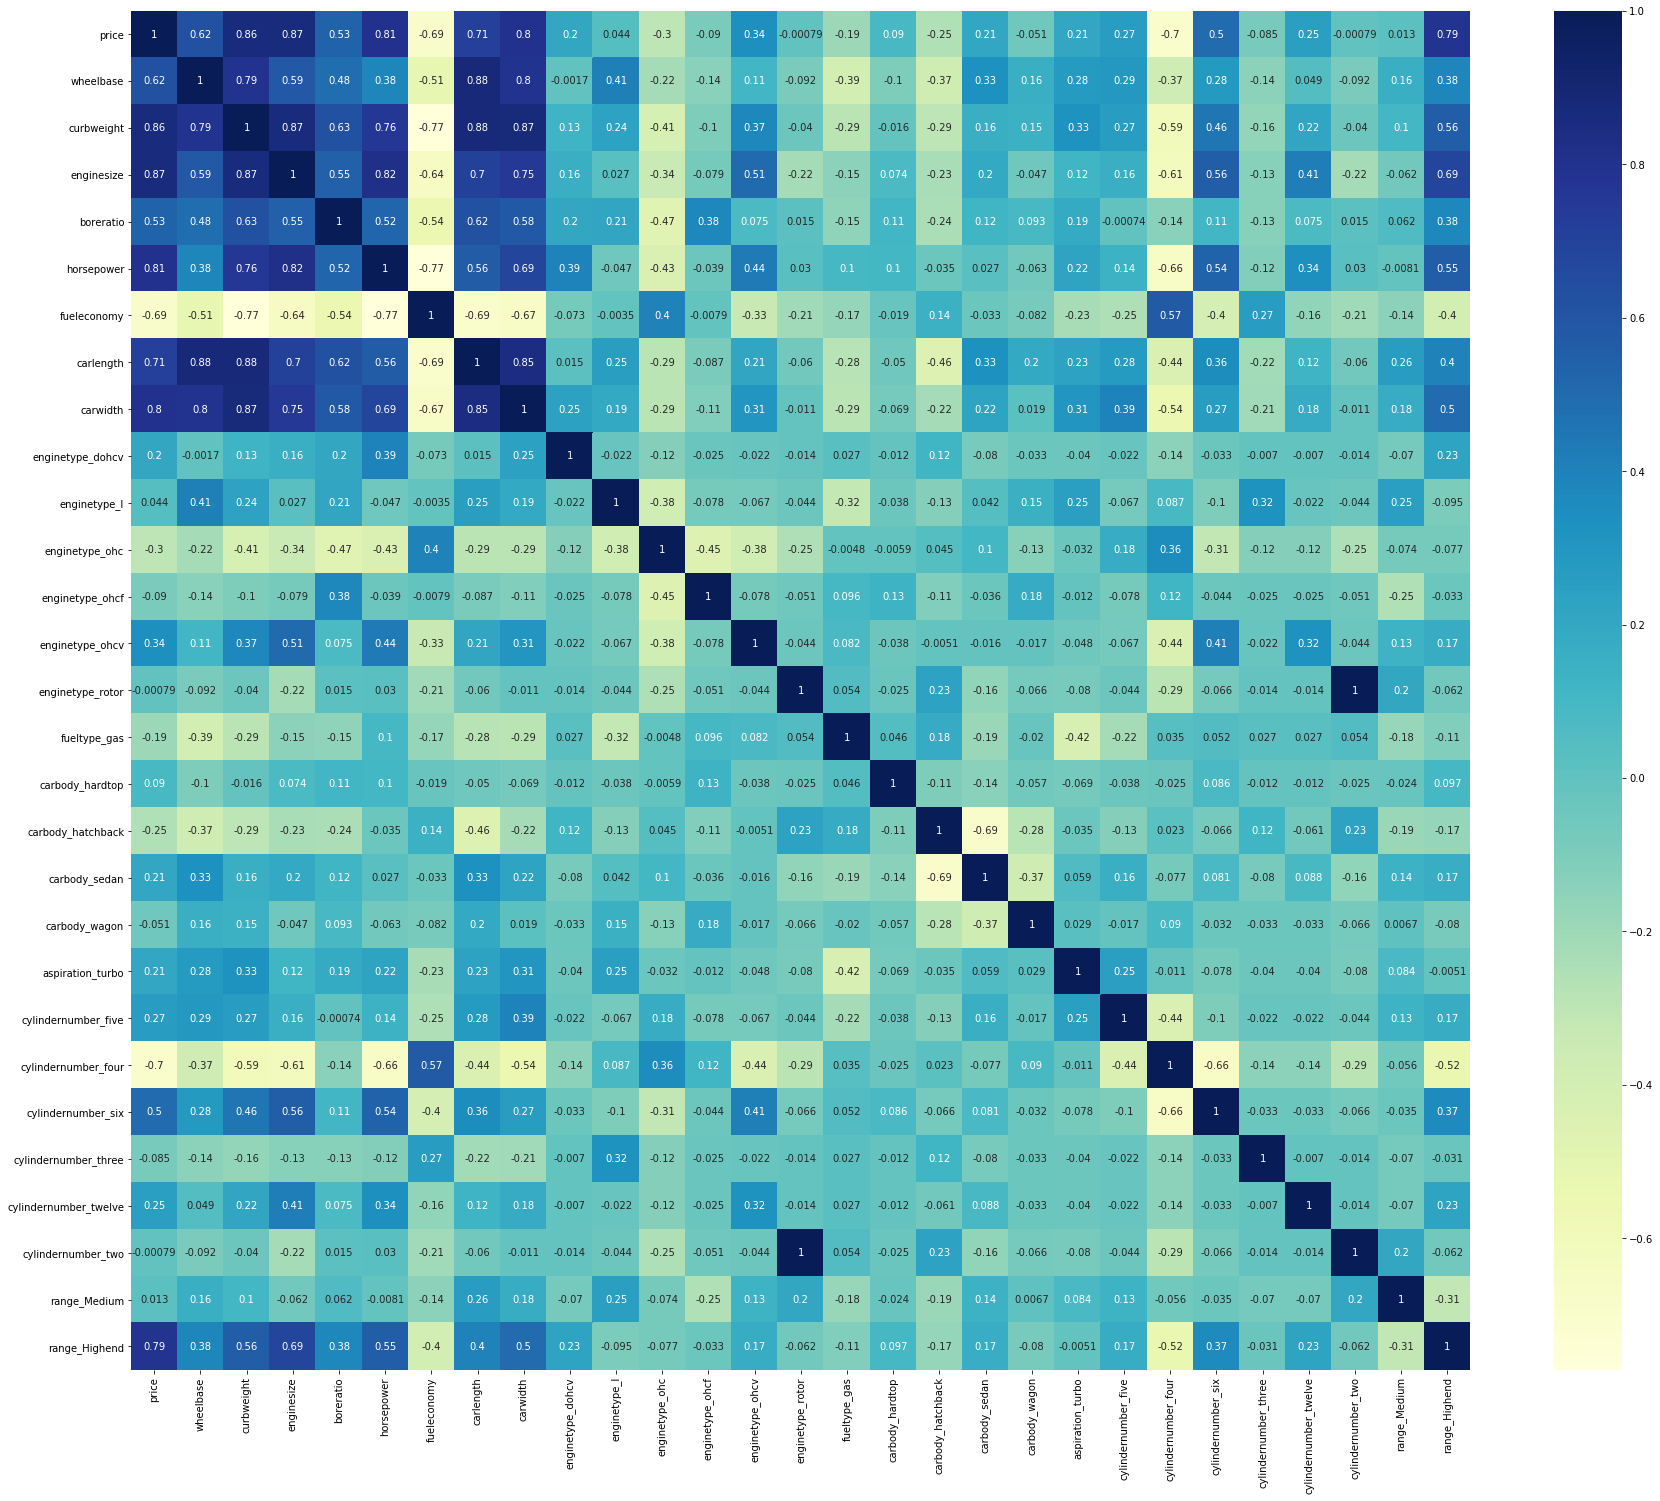

In [264]:
#Correlation using heatmap
plt.figure(figsize=(30,25))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

#### Highly correlated variable to price are - curbweight, enginesize, horsepower, carwidth and highend.

In [265]:
# Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

## Model Building using linear regression

In [266]:
#Feature selection using RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [267]:
# Fitting linear regression and feature selection using Rfe
lr = LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(lr,10)
rfe = rfe.fit(X_train, y_train)

In [268]:
#supporting features
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth',
       'enginetype_dohcv', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'cylindernumber_twelve', 'range_Highend'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [269]:
# Selecting 10 most important features selected by rfe and making new dataframe
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,fueleconomy,carwidth,enginetype_dohcv,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_twelve,range_Highend
122,0.272692,0.083333,0.530864,0.291667,0,0,1,0,0,0
125,0.500388,0.395833,0.213992,0.666667,0,1,0,0,0,1
166,0.314973,0.266667,0.344307,0.308333,0,1,0,0,0,0
1,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.122085,0.575000,0,0,0,1,0,0


In [270]:
#Function for model building
def build_model(X,y):
    X = sm.add_constant(X) #adding constant
    lm = sm.OLS(y,X).fit()  #fitting model
    print(lm.summary())
    return X

In [271]:
# Function for checking VIF(Variance inflation factor)
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

## *Model 01*

In [272]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           1.29e-70
Time:                        13:47:55   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

* p-value of fueleconomy and cylindernumber_twelve are higher than the significance value of 0.05
  dropping it as it is insignifivant in presence of other variables.

In [273]:
#droping cylindernumber_twelve and fueleconomy
X_train_new = X_train_rfe.drop(['cylindernumber_twelve','fueleconomy'],axis=1)

## *Model 02*

In [274]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           7.86e-72
Time:                        13:48:02   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0305      0.02

In [275]:
# Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,26.90
1,curbweight,8.10
6,carbody_sedan,6.07
5,carbody_hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
7,carbody_wagon,3.58
8,range_Highend,1.63
4,enginetype_dohcv,1.46


* Dropping curbweight because of high VIF value(curbweight has high multicollinearity)

In [276]:
X_train_new = X_train_new.drop('curbweight',axis=1)

## *Model 03*

In [277]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           4.70e-70
Time:                        13:48:22   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0319      0.02

In [278]:
# Checking VIF again
checkVIF(X_train_new)

,Features,VIF
0,const,26.89
5,carbody_sedan,6.06
4,carbody_hatchback,5.54
6,carbody_wagon,3.47
1,horsepower,2.50
2,carwidth,2.22
7,range_Highend,1.56
3,enginetype_dohcv,1.21


* carbody_sedan have high value of VIF so dropping it.

In [279]:
X_train_new.drop('carbody_sedan',axis=1,inplace=True)

## *Model 04*

In [280]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           1.68e-69
Time:                        13:52:20   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0934      0.01

* carbody_wagon has high p-value comapred to significance value 0.05 so dropping it.

In [281]:
X_train_new.drop('carbody_wagon',axis=1,inplace=True)

## *Model 05*

In [282]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           1.57e-70
Time:                        13:57:04   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0970      0.01

In [283]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.39
1,horsepower,2.39
2,carwidth,2.08
5,range_Highend,1.53
3,enginetype_dohcv,1.21
4,carbody_hatchback,1.13


## Residual Analysis of Model

In [284]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Error')

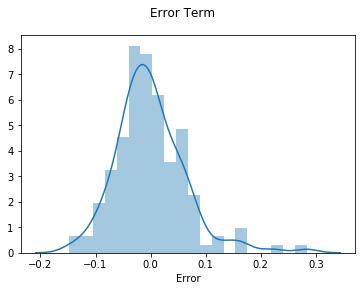

In [285]:
# Ploting error term
fig = plt.figure()
sns.distplot((y_train - y_train_price),bins=20)
fig.suptitle('Error Term')
plt.xlabel('Error')

## Prediction and Evaluation

In [287]:
# Scalling test set
num_vars = ['price','wheelbase','curbweight','enginesize','boreratio','horsepower','fueleconomy','carlength','carwidth']
df_test[num_vars] = sc.fit_transform(df_test[num_vars])

In [288]:
# Dividing into dependent and independent variabel
y_test = df_test.pop('price')
X_test = df_test

In [289]:
# use model to make predication
X_train_new = X_train_new.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [290]:
# Making Predictions
y_pred = lm.predict(X_test_new)

In [291]:
# Evaluating by r2_score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8146383709044555